# Setting up Kaggle


In [1]:

!pip install kaggle

In [2]:
!ls

aisles.csv		       order_products__train.csv.zip
aisles.csv.zip		       orders.csv
departments.csv		       orders.csv.zip
departments.csv.zip	       products.csv
__MACOSX		       products.csv.zip
order_products__prior.csv      sample_data
order_products__prior.csv.zip  sample_submission.csv
order_products__train.csv      sample_submission.csv.zip


In [3]:
!mkdir .kaggle


mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
import json

In [0]:
token = {"username":"ishmeet","key":"9b5a5ae3fbe7edfce9dfe81b46a740dc"}

In [68]:
!mkdir ~/.kaggle
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json


In [8]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

#                                                 importing DataSet





In [10]:
!kaggle datasets list -s Instacart

ref                                          title                              size  lastUpdated          downloadCount  
-------------------------------------------  --------------------------------  -----  -------------------  -------------  
psparks/instacart-market-basket-analysis     Instacart Market Basket Analysis  197MB  2017-11-20 03:08:26           1500  
viswajithkn/instacart-predict-shopping-time  Instacart Predict Shopping Time    12MB  2018-10-29 17:24:48             59  
samwhitehill/instacart-training-sample       InstaCart training sample           1MB  2017-07-01 20:24:11             61  
samwhitehill/instacart-sample-labels         Instacart sample labels             8KB  2017-07-01 20:26:16             13  


In [11]:
!kaggle competitions download -c instacart-market-basket-analysis  -p /content

departments.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
aisles.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
order_products__train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
products.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
orders.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
order_products__prior.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [12]:
!unzip \*.zip

Archive:  departments.csv.zip
replace departments.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N

Archive:  order_products__train.csv.zip

Archive:  orders.csv.zip

Archive:  aisles.csv.zip

Archive:  order_products__prior.csv.zip

Archive:  products.csv.zip

Archive:  sample_submission.csv.zip

7 archives were successfully processed.


#Checking Data

In [0]:
import pandas as pd
import gc                         
gc.enable()     


In [14]:
sample = pd.read_csv('/content/sample_submission.csv')
sample.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [15]:
order_products_train = pd.read_csv('/content/order_products__train.csv')
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [16]:
departments = pd.read_csv('/content/departments.csv')
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [17]:
orders = pd.read_csv('/content/orders.csv')
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [18]:
aisles = pd.read_csv('/content/aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [19]:
order_products_prior = pd.read_csv('/content/order_products__prior.csv')
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [20]:
products = pd.read_csv('/content/products.csv')
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# Manipulating data 

In [0]:
aisles['aisle'] = aisles['aisle'].astype('category')
departments['department'] = departments['department'].astype('category')
orders['eval_set'] = orders['eval_set'].astype('category')
products['product_name'] = products['product_name'].astype('category')

In [22]:
given_data = orders.merge(order_products_prior, on='order_id', how='inner')
given_data.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [23]:
user = given_data.groupby('user_id')[['order_number']].max()
user.columns = ['u_total_orders']
user.head()

,u_total_orders
user_id,
1,10
2,14
3,12
4,5
5,4


In [24]:
user = user.reset_index()
user.head()

,user_id,u_total_orders
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4


In [25]:
user_reordering = given_data.groupby('user_id')['reordered'].mean().to_frame('u_reordered_ratio')
user_reordering = user_reordering.reset_index()
user_reordering.head()

,user_id,u_reordered_ratio
0,1,0.694915
1,2,0.476923
2,3,0.625000
3,4,0.055556
4,5,0.378378


In [26]:
user = user.merge(user_reordering, on='user_id', how='left')

del user_reordering
gc.collect()

user.head()

,user_id,u_total_orders,u_reordered_ratio
0,1,10,0.694915
1,2,14,0.476923
2,3,12,0.625000
3,4,5,0.055556
4,5,4,0.378378


In [27]:
no_of_purchases = given_data.groupby('product_id')['order_id'].count().to_frame('p_total_purchases')
no_of_purchases.head()

,p_total_purchases
product_id,
1,1852
2,90
3,277
4,329
5,15


In [28]:
no_of_purchases = no_of_purchases.reset_index()
no_of_purchases.head()

,product_id,p_total_purchases
0,1,1852
1,2,90
2,3,277
3,4,329
4,5,15


In [29]:
probability_of_reordering = given_data.groupby('product_id').filter(lambda x: x.shape[0] >40)
probability_of_reordering.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,196,1,0
1,2539329,1,prior,1,2,8,NaN,14084,2,0
2,2539329,1,prior,1,2,8,NaN,12427,3,0
3,2539329,1,prior,1,2,8,NaN,26088,4,0
4,2539329,1,prior,1,2,8,NaN,26405,5,0


In [30]:
probability_of_reordering = probability_of_reordering.groupby('product_id')['reordered'].mean().to_frame('p_reorder_ratio')
probability_of_reordering = probability_of_reordering.reset_index()
probability_of_reordering.head()

,product_id,p_reorder_ratio
0,1,0.613391
1,2,0.133333
2,3,0.732852
3,4,0.446809
4,8,0.503030


In [31]:
no_of_purchases = no_of_purchases.merge(probability_of_reordering, on='product_id', how='left')
del probability_of_reordering
gc.collect()
no_of_purchases.head()

,product_id,p_total_purchases,p_reorder_ratio
0,1,1852,0.613391
1,2,90,0.133333
2,3,277,0.732852
3,4,329,0.446809
4,5,15,NaN


In [32]:
no_of_purchases['p_reorder_ratio'] = no_of_purchases['p_reorder_ratio'].fillna(value=0)
no_of_purchases.head()

,product_id,p_total_purchases,p_reorder_ratio
0,1,1852,0.613391
1,2,90,0.133333
2,3,277,0.732852
3,4,329,0.446809
4,5,15,0.000000


In [33]:
uxp = given_data.groupby(['user_id', 'product_id'])['order_id'].count().to_frame('uxp_total_bought')
uxp.head()

uxp_total_bought
user_id product_id                  
1       196                       10
        10258                      9
        10326                      1
        12427                     10
        13032                      3

In [34]:
uxp = uxp.reset_index()
uxp.head()

,user_id,product_id,uxp_total_bought
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


In [35]:
times = given_data.groupby(['user_id', 'product_id'])[['order_id']].count()
times.columns = ['Times_Bought_N']
times.head()

Times_Bought_N
user_id product_id                
1       196                     10
        10258                    9
        10326                    1
        12427                   10
        13032                    3

In [36]:
total_orders = given_data.groupby('user_id')['order_number'].max().to_frame('total_orders')
total_orders.head()

,total_orders
user_id,
1,10
2,14
3,12
4,5
5,4


In [37]:
first_order_no = given_data.groupby(['user_id', 'product_id'])['order_number'].min().to_frame('first_order_number')
first_order_no  = first_order_no.reset_index()
first_order_no.head()

,user_id,product_id,first_order_number
0,1,196,1
1,1,10258,2
2,1,10326,5
3,1,12427,1
4,1,13032,2


In [38]:
span = pd.merge(total_orders, first_order_no, on='user_id' , how='right')
span.head()

,user_id,total_orders,product_id,first_order_number
0,1,10,196,1
1,1,10,10258,2
2,1,10,10326,5
3,1,10,12427,1
4,1,10,13032,2


In [39]:
span['Order_Range_D'] = span.total_orders - span.first_order_number + 1
span.head()

,user_id,total_orders,product_id,first_order_number,Order_Range_D
0,1,10,196,1,10
1,1,10,10258,2,9
2,1,10,10326,5,6
3,1,10,12427,1,10
4,1,10,13032,2,9


In [40]:
uxp_ratio = pd.merge(times, span, on=['user_id', 'product_id'], how='left')
uxp_ratio.head()

,user_id,product_id,Times_Bought_N,total_orders,first_order_number,Order_Range_D
0,1,196,10,10,1,10
1,1,10258,9,10,2,9
2,1,10326,1,10,5,6
3,1,12427,10,10,1,10
4,1,13032,3,10,2,9


In [41]:
uxp_ratio['uxp_reorder_ratio'] = uxp_ratio.Times_Bought_N / uxp_ratio.Order_Range_D
uxp_ratio.head()

,user_id,product_id,Times_Bought_N,total_orders,first_order_number,Order_Range_D,uxp_reorder_ratio
0,1,196,10,10,1,10,1.000000
1,1,10258,9,10,2,9,1.000000
2,1,10326,1,10,5,6,0.166667
3,1,12427,10,10,1,10,1.000000
4,1,13032,3,10,2,9,0.333333


In [42]:
uxp_ratio = uxp_ratio.drop(['Times_Bought_N', 'total_orders', 'first_order_number', 'Order_Range_D'], axis=1)
uxp_ratio.head()

,user_id,product_id,uxp_reorder_ratio
0,1,196,1.000000
1,1,10258,1.000000
2,1,10326,0.166667
3,1,12427,1.000000
4,1,13032,0.333333


In [0]:
del [times, first_order_no, span]

In [44]:
uxp = uxp.merge(uxp_ratio, on=['user_id', 'product_id'], how='left')

del uxp_ratio
uxp.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio
0,1,196,10,1.000000
1,1,10258,9,1.000000
2,1,10326,1,0.166667
3,1,12427,10,1.000000
4,1,13032,3,0.333333


In [45]:
data = uxp.merge(user, on='user_id', how='left')
data.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,u_total_orders,u_reordered_ratio
0,1,196,10,1.000000,10,0.694915
1,1,10258,9,1.000000,10,0.694915
2,1,10326,1,0.166667,10,0.694915
3,1,12427,10,1.000000,10,0.694915
4,1,13032,3,0.333333,10,0.694915


In [46]:
data = data.merge(no_of_purchases, on='product_id', how='left')
data.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,u_total_orders,u_reordered_ratio,p_total_purchases,p_reorder_ratio
0,1,196,10,1.000000,10,0.694915,35791,0.776480
1,1,10258,9,1.000000,10,0.694915,1946,0.713772
2,1,10326,1,0.166667,10,0.694915,5526,0.652009
3,1,12427,10,1.000000,10,0.694915,6476,0.740735
4,1,13032,3,0.333333,10,0.694915,3751,0.657158


In [47]:
del given_data, user, no_of_purchases, uxp
gc.collect()

105

In [48]:
orders_future = orders[((orders.eval_set=='train') | (orders.eval_set=='test'))]
orders_future = orders_future[ ['user_id', 'eval_set', 'order_id'] ]
orders_future.head(10)

,user_id,eval_set,order_id
10,1,train,1187899
25,2,train,1492625
38,3,test,2774568
44,4,test,329954
49,5,train,2196797
53,6,test,1528013
74,7,train,525192
78,8,train,880375
82,9,train,1094988
88,10,train,1822501


In [49]:
data = data.merge(orders_future, on='user_id', how='left')
data.head(10)

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,u_total_orders,u_reordered_ratio,p_total_purchases,p_reorder_ratio,eval_set,order_id
0,1,196,10,1.000000,10,0.694915,35791,0.776480,train,1187899
1,1,10258,9,1.000000,10,0.694915,1946,0.713772,train,1187899
2,1,10326,1,0.166667,10,0.694915,5526,0.652009,train,1187899
3,1,12427,10,1.000000,10,0.694915,6476,0.740735,train,1187899
4,1,13032,3,0.333333,10,0.694915,3751,0.657158,train,1187899
5,1,13176,2,0.222222,10,0.694915,379450,0.832555,train,1187899
6,1,14084,1,0.100000,10,0.694915,15935,0.810982,train,1187899
7,1,17122,1,0.166667,10,0.694915,13880,0.675576,train,1187899
8,1,25133,8,1.000000,10,0.694915,6196,0.740155,train,1187899
9,1,26088,2,0.200000,10,0.694915,2523,0.539041,train,1187899


In [50]:
data_train = data[data.eval_set=='train']
data_train.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,u_total_orders,u_reordered_ratio,p_total_purchases,p_reorder_ratio,eval_set,order_id
0,1,196,10,1.000000,10,0.694915,35791,0.776480,train,1187899
1,1,10258,9,1.000000,10,0.694915,1946,0.713772,train,1187899
2,1,10326,1,0.166667,10,0.694915,5526,0.652009,train,1187899
3,1,12427,10,1.000000,10,0.694915,6476,0.740735,train,1187899
4,1,13032,3,0.333333,10,0.694915,3751,0.657158,train,1187899


In [51]:
data_train = data_train.merge(order_products_train[['product_id','order_id', 'reordered']], on=['product_id','order_id'], how='left' )
data_train.head(15)

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,u_total_orders,u_reordered_ratio,p_total_purchases,p_reorder_ratio,eval_set,order_id,reordered
0,1,196,10,1.000000,10,0.694915,35791,0.776480,train,1187899,1.0
1,1,10258,9,1.000000,10,0.694915,1946,0.713772,train,1187899,1.0
2,1,10326,1,0.166667,10,0.694915,5526,0.652009,train,1187899,NaN
3,1,12427,10,1.000000,10,0.694915,6476,0.740735,train,1187899,NaN
4,1,13032,3,0.333333,10,0.694915,3751,0.657158,train,1187899,1.0
5,1,13176,2,0.222222,10,0.694915,379450,0.832555,train,1187899,NaN
6,1,14084,1,0.100000,10,0.694915,15935,0.810982,train,1187899,NaN
7,1,17122,1,0.166667,10,0.694915,13880,0.675576,train,1187899,NaN
8,1,25133,8,1.000000,10,0.694915,6196,0.740155,train,1187899,1.0
9,1,26088,2,0.200000,10,0.694915,2523,0.539041,train,1187899,1.0


In [52]:
data_train['reordered'] = data_train['reordered'].fillna(0)
data_train.head(15)

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,u_total_orders,u_reordered_ratio,p_total_purchases,p_reorder_ratio,eval_set,order_id,reordered
0,1,196,10,1.000000,10,0.694915,35791,0.776480,train,1187899,1.0
1,1,10258,9,1.000000,10,0.694915,1946,0.713772,train,1187899,1.0
2,1,10326,1,0.166667,10,0.694915,5526,0.652009,train,1187899,0.0
3,1,12427,10,1.000000,10,0.694915,6476,0.740735,train,1187899,0.0
4,1,13032,3,0.333333,10,0.694915,3751,0.657158,train,1187899,1.0
5,1,13176,2,0.222222,10,0.694915,379450,0.832555,train,1187899,0.0
6,1,14084,1,0.100000,10,0.694915,15935,0.810982,train,1187899,0.0
7,1,17122,1,0.166667,10,0.694915,13880,0.675576,train,1187899,0.0
8,1,25133,8,1.000000,10,0.694915,6196,0.740155,train,1187899,1.0
9,1,26088,2,0.200000,10,0.694915,2523,0.539041,train,1187899,1.0


In [53]:
data_train = data_train.set_index(['user_id', 'product_id'])
data_train.head(15)

uxp_total_bought  uxp_reorder_ratio  ...  order_id  reordered
user_id product_id                                       ...                     
1       196                       10           1.000000  ...   1187899        1.0
        10258                      9           1.000000  ...   1187899        1.0
        10326                      1           0.166667  ...   1187899        0.0
        12427                     10           1.000000  ...   1187899        0.0
        13032                      3           0.333333  ...   1187899        1.0
        13176                      2           0.222222  ...   1187899        0.0
        14084                      1           0.100000  ...   1187899        0.0
        17122                      1           0.166667  ...   1187899        0.0
        25133                      8           1.000000  ...   1187899        1.0
        26088                      2           0.200000  ...   1187899        1.0
        26405                      2           0.200000  ...   1187899        1.0
        30450                      1           0.125000  ...   1187899        0.0
        35951                      1           1.000000  ...   1187899        0.0
        38928                      1           1.000000  ...   1187899        1.0
        39657                      1           1.000000  ...   1187899        1.0

[15 rows x 9 columns]

In [54]:
data_train = data_train.drop(['eval_set', 'order_id'], axis=1)
data_train.head(15)

uxp_total_bought  ...  reordered
user_id product_id                    ...           
1       196                       10  ...        1.0
        10258                      9  ...        1.0
        10326                      1  ...        0.0
        12427                     10  ...        0.0
        13032                      3  ...        1.0
        13176                      2  ...        0.0
        14084                      1  ...        0.0
        17122                      1  ...        0.0
        25133                      8  ...        1.0
        26088                      2  ...        1.0
        26405                      2  ...        1.0
        30450                      1  ...        0.0
        35951                      1  ...        0.0
        38928                      1  ...        1.0
        39657                      1  ...        1.0

[15 rows x 7 columns]

In [55]:
data_test = data[data.eval_set=='test']
data_test.head()

,user_id,product_id,uxp_total_bought,uxp_reorder_ratio,u_total_orders,u_reordered_ratio,p_total_purchases,p_reorder_ratio,eval_set,order_id
120,3,248,1,0.090909,12,0.625,6371,0.400251,test,2774568
121,3,1005,1,0.333333,12,0.625,463,0.440605,test,2774568
122,3,1819,3,0.333333,12,0.625,2424,0.492162,test,2774568
123,3,7503,1,0.100000,12,0.625,12474,0.553551,test,2774568
124,3,8021,1,0.090909,12,0.625,27864,0.591157,test,2774568


In [56]:
data_test = data_test.set_index(['user_id', 'product_id'])
data_test.head()

uxp_total_bought  uxp_reorder_ratio  ...  eval_set  order_id
user_id product_id                                       ...                    
3       248                        1           0.090909  ...      test   2774568
        1005                       1           0.333333  ...      test   2774568
        1819                       3           0.333333  ...      test   2774568
        7503                       1           0.100000  ...      test   2774568
        8021                       1           0.090909  ...      test   2774568

[5 rows x 8 columns]

In [57]:
data_test = data_test.drop(['eval_set','order_id'], axis=1)
data_test.head()

uxp_total_bought  ...  p_reorder_ratio
user_id product_id                    ...                 
3       248                        1  ...         0.400251
        1005                       1  ...         0.440605
        1819                       3  ...         0.492162
        7503                       1  ...         0.553551
        8021                       1  ...         0.591157

[5 rows x 6 columns]

# Train Model


In [0]:

from sklearn.ensemble import RandomForestClassifier


In [0]:
X_train, y_train = data_train.drop('reordered', axis=1), data_train.reordered


In [0]:
rfc = RandomForestClassifier(n_estimators=5,max_depth=5 ,random_state=42)


In [0]:
model = rfc.fit(X_train, y_train)


In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split #validate algorithm
from sklearn.metrics import f1_score, classification_report, confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(data_train.drop('reordered', axis=1), data_train.reordered, test_size=0.8, random_state=42)
rfc = RandomForestClassifier(n_estimators=5, max_depth = 5 ,random_state=42)
model = rfc.fit(X_train, y_train)
y_val_pred = (model.predict_proba(X_val)[:,1] >= 0.30).astype(int)
print("RESULTS ON VALIDATION SET\n====================")
print("F1 Score: ",f1_score(y_val, y_val_pred, average='binary'), "\n====================")
print("Classification Report\n ", classification_report(y_val, y_val_pred), "\n====================")
print("Confusion Matrix\n ", confusion_matrix(y_val, y_val_pred))
del [X_val, y_val]




RESULTS ON VALIDATION SET
F1 Score:  0.3662324667864885 
Classification Report
                precision    recall  f1-score   support

         0.0       0.93      0.96      0.95   6116209
         1.0       0.48      0.30      0.37    663520

    accuracy                           0.90   6779729
   macro avg       0.70      0.63      0.66   6779729
weighted avg       0.88      0.90      0.89   6779729
 
Confusion Matrix
  [[5898001  218208]
 [ 465868  197652]]


                   importance
uxp_reorder_ratio    0.477065
uxp_total_bought     0.290828
p_reorder_ratio      0.130616
u_total_orders       0.057900
p_total_purchases    0.026062
u_reordered_ratio    0.017528


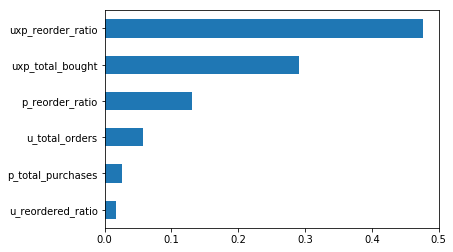

                   importance
uxp_reorder_ratio    0.477065
uxp_total_bought     0.290828
p_reorder_ratio      0.130616
u_total_orders       0.057900
p_total_purchases    0.026062
u_reordered_ratio    0.017528


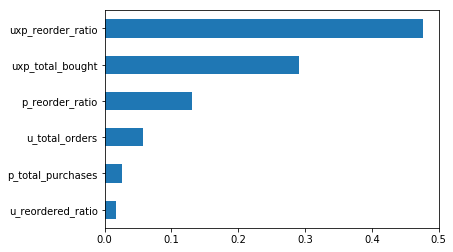

In [64]:
feature_importances_df = pd.DataFrame(model.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances_df)

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns).sort_values()
feat_importances.plot(kind='barh')
